# Day 02: Using KNN to classify objects with `sklearn` and `pandas` - solution

*This is only one of the possible solutions. There are many ways to answer these questions.*

![KNN Classifier](https://upload.wikimedia.org/wikipedia/commons/7/78/KNN_decision_surface_animation.gif)

## Learning goals

Today, we will make sure that everyone learns how they can use `scikit-learn` to classify objects using the KNN algorithm. We will also learn how to use `pandas` to load and explore datasets, and how to visualize data with `matplotlib` and `seaborn`.

After working through these ideas, you should be able to:
1. Load a dataset using `pandas`.
2. Explore a dataset using `pandas`.
3. Visualize data using `matplotlib` and `seaborn`.
4. Explain how the KNN algorithm works.
5. Use `scikit-learn` to classify objects using the KNN algorithm.
6. Use `scikit-learn` to evaluate the performance of a classifier.
7. Explain the framework of a classification task.

## Notebook instructions

We will work through the notebook making sure to write all necessary code and answer any questions. We will start together with the most commonly performed tasks. Then you will work on the analyses, posed as research questions, in groups.

## Outline:

1. [Stellar Classification Dataset - SDSS17](#dataset)
2. [The 2 Class Problem - Modeling Without Redshift](#two-class-no-redshift)
3. [The 2 Class Problem - Modeling With Redshift](#two-class)
4. [The Three Class Problem - Modeling with Redshift](#three-class)

---
<a id="dataset"></a>
## 1. Stellar Classification Dataset - SDSS17

We will continue to use the [Stellar Classification Dataset](https://www.kaggle.com/datasets/sohier/stellar-classification-dataset-sdss17) from the Sloan Digital Sky Survey (SDSS). The dataset contains information about stars, including their spectral features and classifications.

The dataset is available in the `data/` directory as `stellar_classification.csv`. But you can also directly download it from GitHub: <https://raw.githubusercontent.com/dannycab/MSU_REU_ML_course/refs/heads/main/activities/data/star_classification.csv>

Much of the code below for importing, cleaning, and plotting the data is borrowed from the [Exploring data with `pandas` notebook](./01-exploring-data-with-pandas.ipynb).

#### ✅ Tasks: 

* Run the code below to import the necessary libraries and load the dataset.
* Make sure you understand what each line of code does.
* Continue to run the code in each cell until you reach the section on redshift.

In [1]:
# necessary imports for this notebook
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks') # setting style
sns.set_context('talk') # setting context
sns.set_palette('colorblind') # setting palette

### Read in the data and filter it

We read in the data using `pandas` and filter it to only include the relevant columns. The dataset contains a lot of information, but we will focus on the spectral features and the classification. We also drop any rows with missing values to ensure our analysis is accurate. We used `describe()` to get an overview of the data and check that we cleaned it correctly.

In [2]:
stellar = pd.read_csv('https://raw.githubusercontent.com/dannycab/MSU_REU_ML_course/refs/heads/main/activities/data/star_classification.csv')
stellar.head()

# remove all the columns that are not needed
df_stellar = stellar[['obj_ID', 'class', 'u', 'g', 'r', 'i', 'z','redshift']]

# drop any row with negative photometric values
filter = (df_stellar['u'] >= 0) & (df_stellar['g'] >= 0) & (df_stellar['r'] >= 0) & (df_stellar['i'] >= 0) & (df_stellar['z'] >= 0)
df_stellar = df_stellar[filter]

# describe the data again
df_stellar.describe()

,obj_ID,u,g,r,i,z,redshift
count,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,1.237665e+18,22.080679,20.631583,19.645777,19.084865,18.768988,0.576667
std,8.438450e+12,2.251068,2.037384,1.854763,1.757900,1.765982,0.730709
min,1.237646e+18,10.996230,10.498200,9.822070,9.469903,9.612333,-0.009971
25%,1.237659e+18,20.352410,18.965240,18.135795,17.732280,17.460830,0.054522
50%,1.237663e+18,22.179140,21.099930,20.125310,19.405150,19.004600,0.424176
75%,1.237668e+18,23.687480,22.123775,21.044790,20.396510,19.921120,0.704172
max,1.237681e+18,32.781390,31.602240,29.571860,32.141470,29.383740,7.011245


### Plot the data to review it

This code is also from the [Exploring data with `pandas` notebook](./01-exploring-data-with-pandas.ipynb). We use `seaborn` to visualize the data. This just reminds us of the data we are working with and helps us understand the distribution of the features.

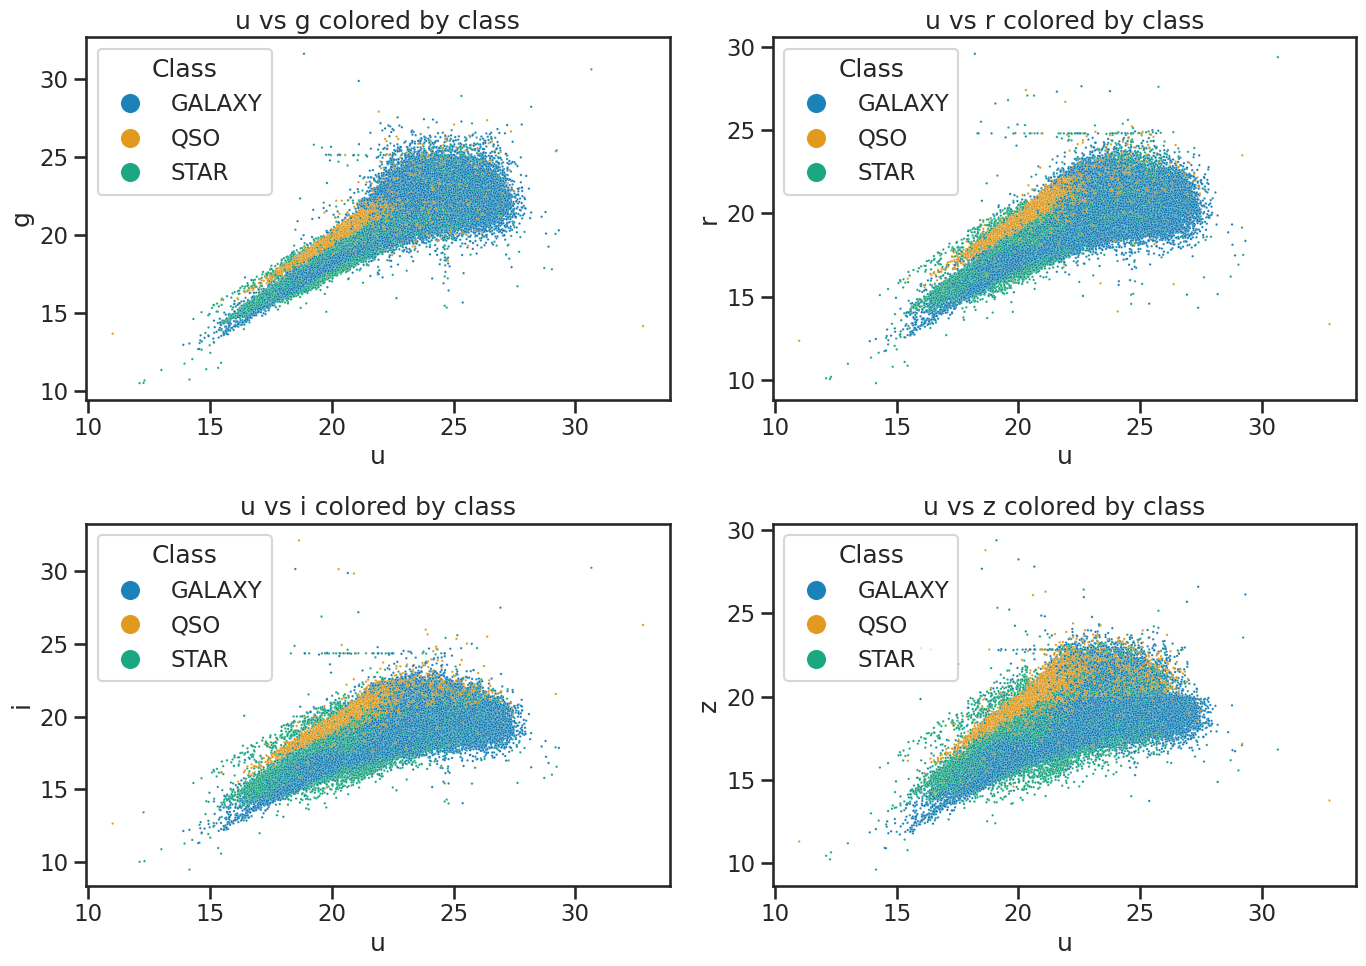

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# u vs g
sns.scatterplot(x='u', y='g', hue='class', data=df_stellar, ax=axes[0, 0], alpha=0.9, s=3)
axes[0, 0].set_xlabel('u')
axes[0, 0].set_ylabel('g')
axes[0, 0].set_title('u vs g colored by class')
axes[0, 0].legend(title='Class', loc='upper left', markerscale=8)

# u vs r
sns.scatterplot(x='u', y='r', hue='class', data=df_stellar, ax=axes[0, 1], alpha=0.9, s=3)
axes[0, 1].set_xlabel('u')
axes[0, 1].set_ylabel('r')
axes[0, 1].set_title('u vs r colored by class')
axes[0, 1].legend(title='Class', loc='upper left', markerscale=8)

# u vs i
sns.scatterplot(x='u', y='i', hue='class', data=df_stellar, ax=axes[1, 0], alpha=0.9, s=3)
axes[1, 0].set_xlabel('u')
axes[1, 0].set_ylabel('i')
axes[1, 0].set_title('u vs i colored by class')
axes[1, 0].legend(title='Class', loc='upper left', markerscale=8)

# u vs z
sns.scatterplot(x='u', y='z', hue='class', data=df_stellar, ax=axes[1, 1], alpha=0.9, s=3)
axes[1, 1].set_xlabel('u')
axes[1, 1].set_ylabel('z')
axes[1, 1].set_title('u vs z colored by class')
axes[1, 1].legend(title='Class', loc='upper left', markerscale=8)


plt.tight_layout()
plt.show()

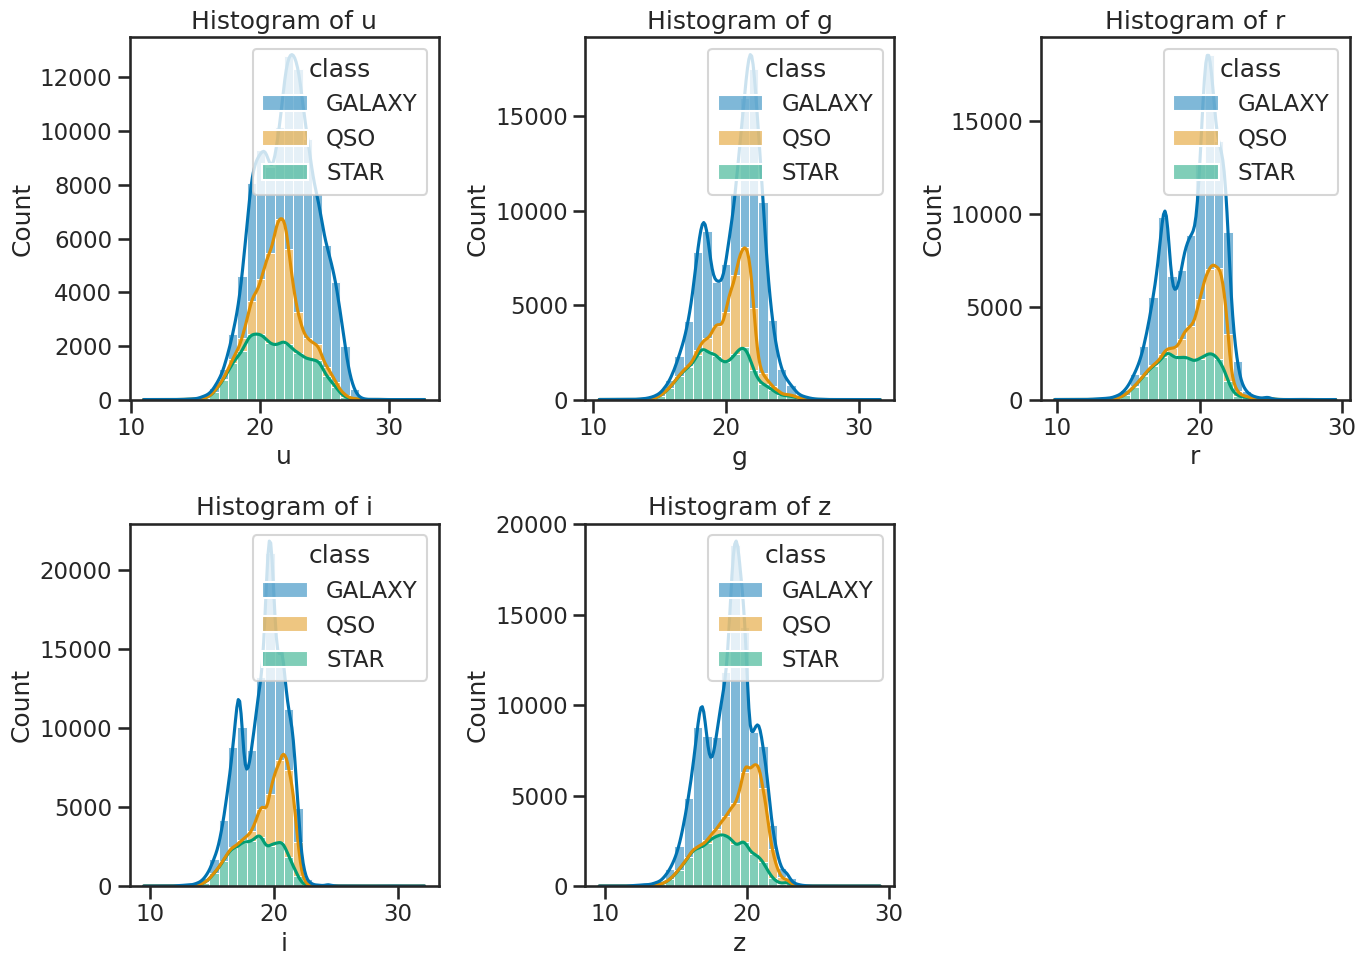

In [4]:
# create subplots
fig, axes = plt.subplots(2, 3, figsize=(14, 10))

# plot histograms for each band with KDE
sns.histplot(data=df_stellar, x='u', hue='class', multiple='stack', ax=axes[0, 0], bins=30, kde=True)
sns.histplot(data=df_stellar, x='g', hue='class', multiple='stack', ax=axes[0, 1], bins=30, kde=True)
sns.histplot(data=df_stellar, x='r', hue='class', multiple='stack', ax=axes[0, 2], bins=30, kde=True)
sns.histplot(data=df_stellar, x='i', hue='class', multiple='stack', ax=axes[1, 0], bins=30, kde=True)
sns.histplot(data=df_stellar, x='z', hue='class', multiple='stack', ax=axes[1, 1], bins=30, kde=True)

axes[1, 2].axis('off')  # Hide the empty subplot

# set titles for each subplot
axes[0, 0].set_title('Histogram of u')
axes[0, 1].set_title('Histogram of g')
axes[0, 2].set_title('Histogram of r')
axes[1, 0].set_title('Histogram of i')
axes[1, 1].set_title('Histogram of z')

plt.tight_layout()
plt.show()

## What about the redshift?

![Redshift diagram](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6a/Redshift.svg/300px-Redshift.svg.png)

We have not yet discussed [redshift](https://en.wikipedia.org/wiki/Redshift), but it is an important concept in astronomy. Redshift is a measure of how much the wavelength of light from an object has been stretched due to the expansion of the universe. It is often used to determine the distance of celestial objects. In this dataset, redshift is included as a feature, but we will not use it (at first) for classification in this activity.

Let's see why we might leave it out at first. We can plot the redshift against the spectral features to see how it relates to the classification of stars.

#### ✅ Tasks: 

* Make a histogram of the redshift values; make sure you can see the distribution of redshift values for the different classes.
* Plot the redshift against the spectral features by class to see how they relate

Once you make them, these plots should help us see that redshift is probably a very good feature for the classification. But we won't use it at first because we want to focus on the spectral features and demonstrate how we can improve models with additional features later.

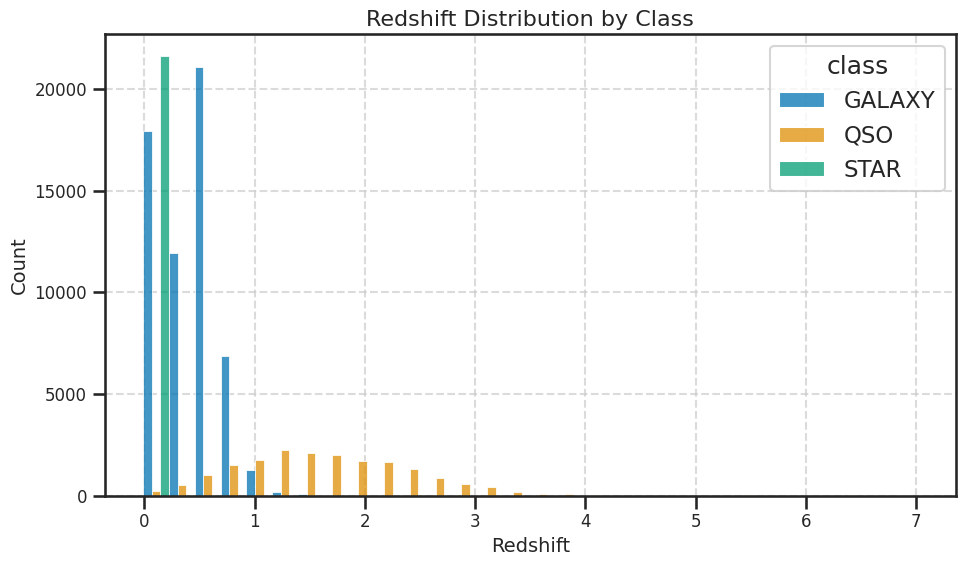

In [5]:
## your code here

fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(data=df_stellar, x='redshift', hue='class', multiple='dodge', ax=ax, bins=30, palette='colorblind')
ax.set_title('Redshift Distribution by Class', fontsize=16)
ax.set_xlabel('Redshift', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

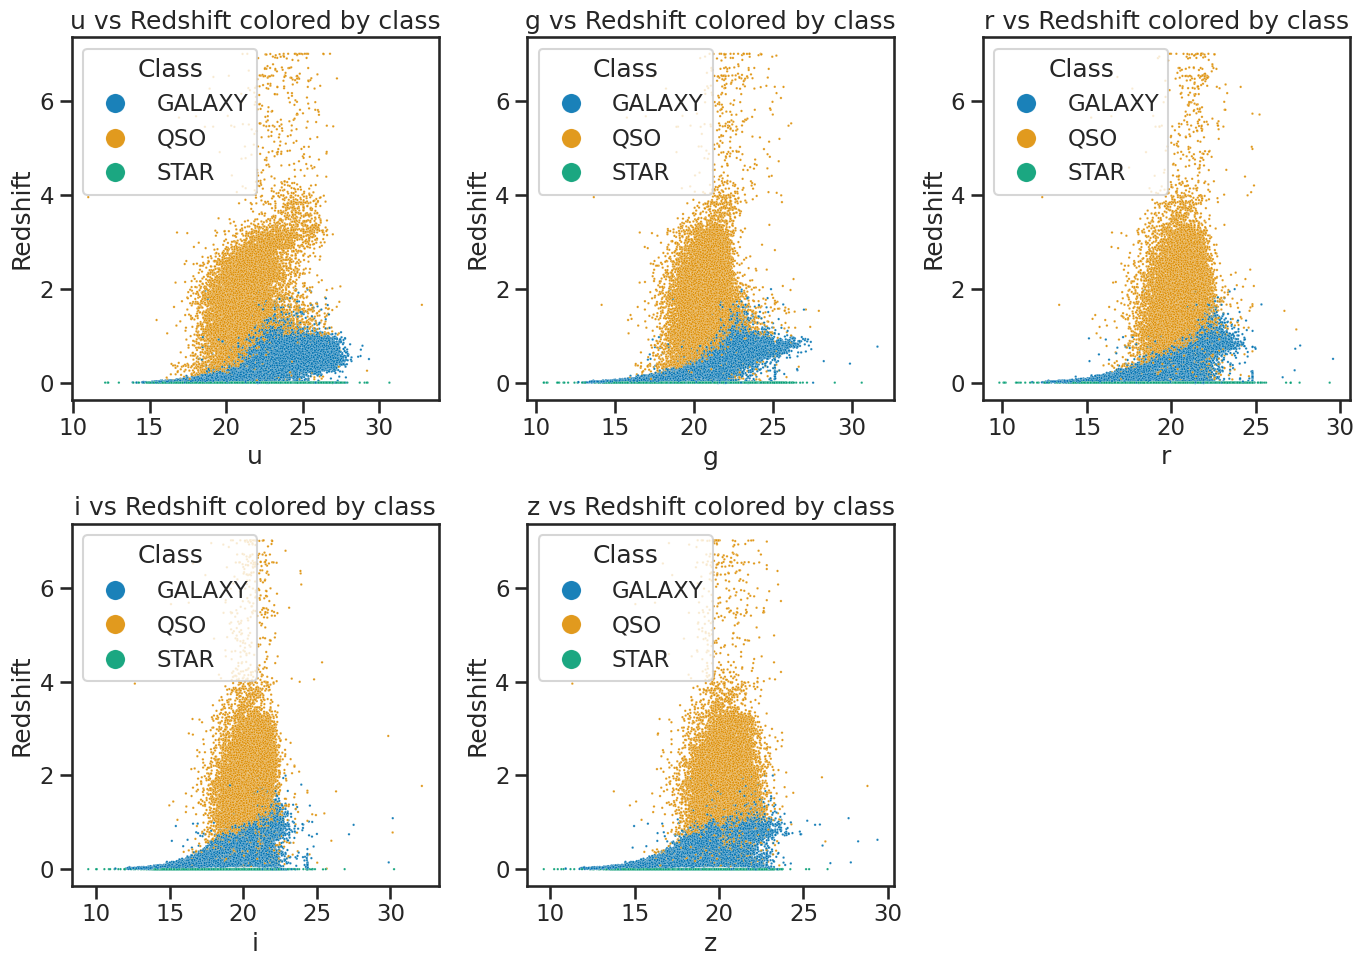

In [6]:
## your code here

fig, axes = plt.subplots(2, 3, figsize=(14, 10))
# u vs redshift
sns.scatterplot(x='u', y='redshift', hue='class', data=df_stellar, ax=axes[0, 0], alpha=0.9, s=3)
axes[0, 0].set_xlabel('u')
axes[0, 0].set_ylabel('Redshift')
axes[0, 0].set_title('u vs Redshift colored by class')
axes[0, 0].legend(title='Class', loc='upper left', markerscale=8)

# g vs redshift
sns.scatterplot(x='g', y='redshift', hue='class', data=df_stellar, ax=axes[0, 1], alpha=0.9, s=3)
axes[0, 1].set_xlabel('g')
axes[0, 1].set_ylabel('Redshift')
axes[0, 1].set_title('g vs Redshift colored by class')
axes[0, 1].legend(title='Class', loc='upper left', markerscale=8)

# r vs redshift
sns.scatterplot(x='r', y='redshift', hue='class', data=df_stellar, ax=axes[0, 2], alpha=0.9, s=3)
axes[0, 2].set_xlabel('r')
axes[0, 2].set_ylabel('Redshift')
axes[0, 2].set_title('r vs Redshift colored by class')
axes[0, 2].legend(title='Class', loc='upper left', markerscale=8)

# i vs redshift
sns.scatterplot(x='i', y='redshift', hue='class', data=df_stellar, ax=axes[1, 0], alpha=0.9, s=3)
axes[1, 0].set_xlabel('i')
axes[1, 0].set_ylabel('Redshift')
axes[1, 0].set_title('i vs Redshift colored by class')
axes[1, 0].legend(title='Class', loc='upper left', markerscale=8)

# z vs redshift
sns.scatterplot(x='z', y='redshift', hue='class', data=df_stellar, ax=axes[1, 1], alpha=0.9, s=3)
axes[1, 1].set_xlabel('z')
axes[1, 1].set_ylabel('Redshift')
axes[1, 1].set_title('z vs Redshift colored by class')
axes[1, 1].legend(title='Class', loc='upper left', markerscale=8)

# make the last subplot empty
axes[1, 2].axis('off')  # Hide the empty subplot

plt.tight_layout()
plt.show()

## Bias in your data?

One important aspect of doing machine learning is to be aware of potential biases in your data. In this case, the dataset is biased towards certain types of observation. There are significantly more observations of the "GALAXY" class. This would mean that a model that predicts GALAXY more often than the other classes would have a high accuracy, but it might not be a good model for all classes. Now, this might not be a big problem if the data if the classes are very separable, but it is something to keep in mind when evaluating the model.

For the purposes of this activity, we will remove "GALAXY" from the dataset to focus on the other classes. This will allow us to see how well the model performs on the other classes without the bias introduced by the GALAXY class. And it makes the resulting model a simple 2-class model, which is easier to start with. We will perform the 3-class model later in the activity.

THe code below show the class distribution and removes the GALAXY class from the dataset. It creates a new DataFrame called `df_no_galaxies` that contains only the non-GALAXY classes. We will use this DataFrame for the rest of the 2-class modeling activity.

#### ✅ Tasks: 

* Run this code to see the class distribution and remove the GALAXY class from the dataset.

/tmp/ipykernel_597/2213807954.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels([f"{cls}\n({percentages[cls]:.1f}%)" for cls in class_counts.index])
/tmp/ipykernel_597/2213807954.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels([f"{label}\n({percentages_no_galaxy[label]:.1f}%)" for label in tick_labels])


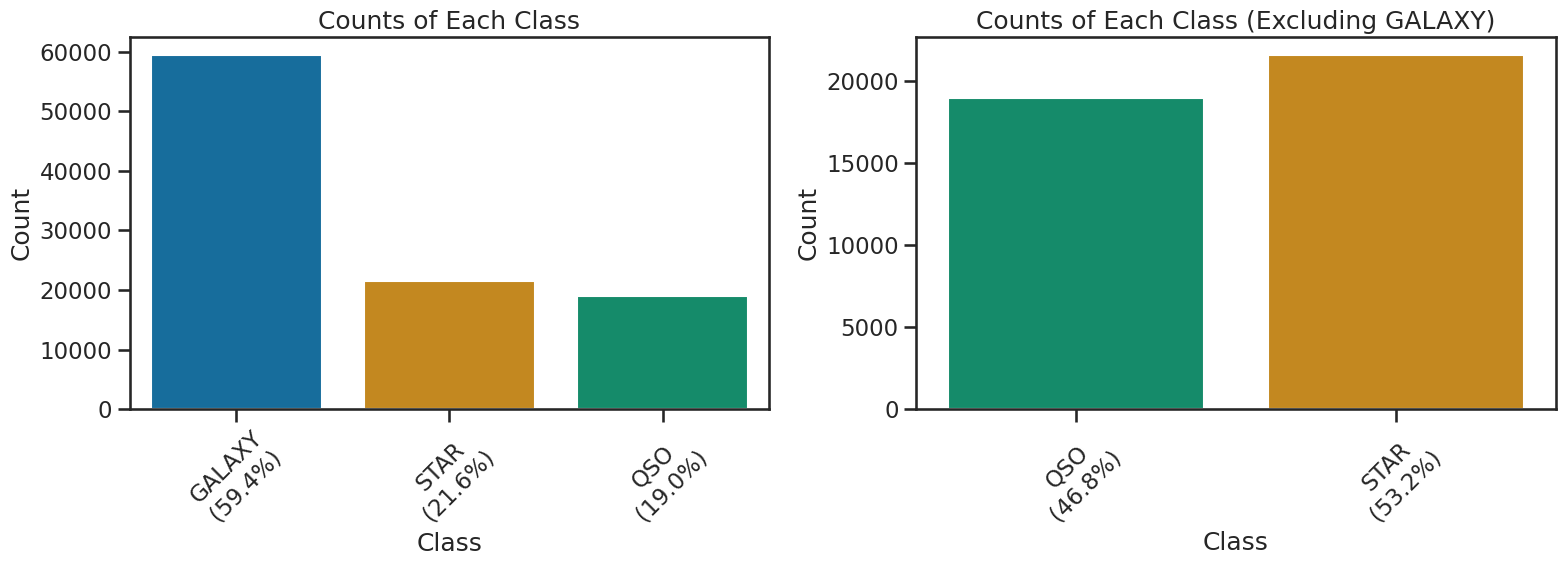

In [7]:
# Run this code to ensure you have the new DataFrame

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# All classes
class_counts = df_stellar['class'].value_counts()
percentages = df_stellar['class'].value_counts(normalize=True) * 100
sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, palette='colorblind', legend=False, ax=axs[0])
axs[0].set_xticklabels([f"{cls}\n({percentages[cls]:.1f}%)" for cls in class_counts.index])
axs[0].set_title('Counts of Each Class')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

# Excluding GALAXY
df_no_galaxies = df_stellar[df_stellar['class'] != 'GALAXY']
percentages_no_galaxy = df_no_galaxies['class'].value_counts(normalize=True) * 100

# Use colorblind palette but skip the reverse order to make sure labels are same as colors in both plots
palette_no_galaxy = sns.color_palette('colorblind')[2:0:-1]

ax2 = sns.countplot(x='class', data=df_no_galaxies, hue='class', palette=palette_no_galaxy, ax=axs[1], legend=False)
tick_labels = [tick.get_text() for tick in ax2.get_xticklabels()]
ax2.set_xticklabels([f"{label}\n({percentages_no_galaxy[label]:.1f}%)" for label in tick_labels])
ax2.set_title('Counts of Each Class (Excluding GALAXY)')
ax2.set_xlabel('Class')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

---
<a id="two-class-no-redshift"></a>
## 2. The 2 Class Problem - Modeling Without Redshift

Now that we have our dataset ready, we can start building a KNN classifier to classify the stars based on their spectral features. We will first build a model without using the redshift feature. To do this we first import the necessary libraries and then split the data into training and testing sets. 

It's common in these codes and in textbooks to use the variable names `X` and `y` to represent the features and labels, respectively. In this case, `X` will be the spectral features and `y` will be the class labels. 

#### ✅ Tasks:
* Run the code below to import the necessary libraries and split the data into training and testing sets.
* Make sure you understand what each line of code does.
* Continue to run the code in each cell until you reach the classification report.

In [8]:
## Import necessary libraries for the classification model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features  and target variable
X = df_no_galaxies[['u', 'g', 'r', 'i', 'z']]
y = df_no_galaxies['class']

### Train-Test Split

We will use the `train_test_split` function from `sklearn.model_selection` to do this. This will randomly split the data into a set that we will use to train the model and a set that we will use to test the model. Initially, we will use 80% of the data for training and 20% for testing. We have selected a random state of 42 to ensure that the split is reproducible. This means that every time we run the code, we will get the same split of the data. You can remove the `random_state` parameter if you want to get a different split each time you run the code. As we will see later, this is important for evaluating the model's performance.


In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling the Data



We will also use the `StandardScaler` from `sklearn.preprocessing` to standardize the features before training the model. This is important because many algorithms, including KNN, are sensitive to the scale of the features. That is, if one feature has a much larger range of values than another, it can dominate the distance calculations used by KNN. Standardizing the features will ensure that they are all on the same scale.

In [10]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### K-Nearest Neighbors Classifier

Now, we can create the KNN classifier using the `KNeighborsClassifier` from `sklearn.neighbors`. We will use 3 neighbors for our model. We can change this later if we want to experiment with different values of `k`. We choose 3 neighbors because it is also illustrated well in the KNN animation below (reproduced from the [Wikipedia article on KNN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)).

![KNN Classifier](https://upload.wikimedia.org/wikipedia/commons/7/78/KNN_decision_surface_animation.gif)

In this animation, we have a 2D feature space, and the points from each of the two classes are shown in red and blue. To classify a new point, we look at the 3 nearest neighbors (the points closest to the new point) and see which class they belong to. In this case, the new point would be predicted to be red or blue depending on the [strength of the metric](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics) used to measure the distance between the points. Weighting and other parameters can also be used to influence the classification.

In the second part of the animation, the 2D space is shown with a grid of locations where the classifier would predict the class of a point at that location. We can see it selects the class of that point based on the three nearest neighbors. What is missing is the metric used to measure the distance between the points. In this case, it might be the [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_space), but other metrics can be used as well. 

The very rough grid that it generates is a visualization of the [decision boundary](https://en.wikipedia.org/wiki/Decision_boundary) created by the KNN classifier. The decision boundary is the line (or surface in higher dimensions) that separates the different classes; there might be multiple for multi-class problems. In this case, it is a boundary that is determined by the distribution of classes in the feature space. As the animation shows, the KNN classifier can create complex decision boundaries based on the distribution of the points. KNN can be a powerful classifier, especially when the classes are not linearly separable (i.e., where we can draw a straight line to separate the classes).


#### ✅ Tasks:
* Run the code below to create the KNN classifier and fit it to the training data.
* Make sure you understand what each line of code does.


In [11]:
# Create and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test_scaled)

### Evaluating the Model

Now that we have trained the model and used it to make predictions given the test set, we can evaluate its performance. This is the supervised part of the supervised learning process. We know what the true labels are for the test set, so we can compare the predicted labels to the true labels to see how well the model performed. If we find that the model performs well, we can use it to classify new data points. If it does not perform well, we can try to improve it by changing the parameters, using different features, or using a different algorithm. 

*Maybe you can see why we left out the redshift feature for now. It is a very good feature, but we want to see how well the model performs without it first.*

#### The Classification Report

We will use the `classification_report` from `sklearn.metrics` to get a detailed report of the model's performance. This report includes precision, recall, and F1-score for each class, as well as overall accuracy.

#### Metrics Explained
The classification report includes the following metrics:
- **Precision**: The ratio of true positive predictions to the total number of positive predictions. It measures how many of the predicted positive cases were actually positive.
- **Recall**: The ratio of true positive predictions to the total number of actual positive cases. It measures how many of the actual positive cases were correctly predicted.
- **F1-score**: The harmonic mean of precision and recall. It is a single metric that balances both precision and recall, especially useful when the class distribution is imbalanced.

### ✅ Tasks:
* Run the code below to generate the classification report.
* Explain the predictions made by the model and the metrics in the classification report to your neighbor.

In [12]:
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         QSO       0.86      0.85      0.85      3803
        STAR       0.87      0.87      0.87      4308

    accuracy                           0.86      8111
   macro avg       0.86      0.86      0.86      8111
weighted avg       0.86      0.86      0.86      8111



### The Confusion Matrix

We will use the `confusion_matrix` from `sklearn.metrics` to visualize the performance of the model. The confusion matrix shows the number of true positive, true negative, false positive, and false negative predictions. This can help us understand where the model is making mistakes. The code below will create a confusion matrix and plot it using `seaborn` for better visualization. This visulization scales the values in the confusion matrix by the total number of data points, so that we can see the relative fraction of correct and incorrect predictions for the whole test set.

#### ✅ Tasks:
* Run the code below to create the confusion matrix and plot it.
* Make sure you understand what each line of code does.
* Explain the confusion matrix to your neighbor.

**How well did the model perform?**

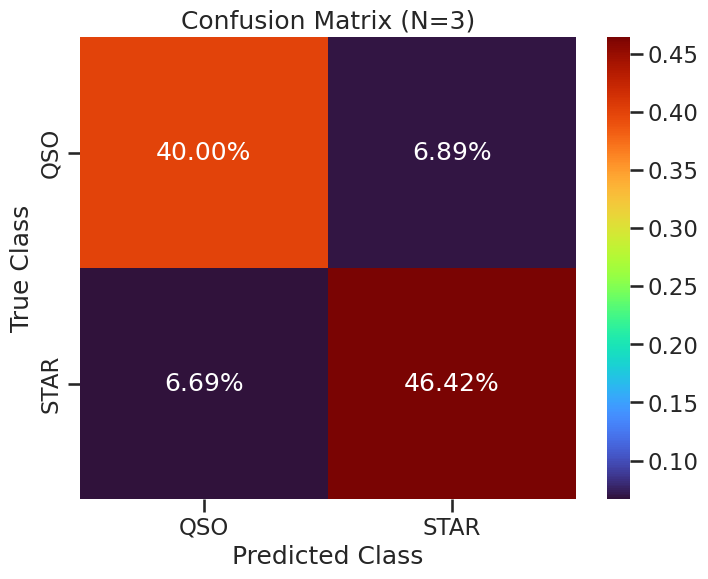

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)

def plot_confusion_matrix(conf_matrix, classes, N=0, filename=None):
    plt.figure(figsize=(8, 6))
    conf_matrix_prop = conf_matrix / conf_matrix.sum()
    sns.heatmap(conf_matrix_prop, annot=True, fmt='.2%', cmap='turbo',
                xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix (N={N})')
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

plot_confusion_matrix(conf_matrix, knn_classifier.classes_, 3, './figures/confusion_matrix_knn_n3.png')

### Plotting Helper Function

There's a function below that will return two dataframes: one with the correctly classified points and one with the misclassified points. This will help us visualize the performance of the model. You can use this function ot you can write your own. But we will need to plot the correctly classified points and the misclassified points to see how well the model performed. 

#### ✅ Tasks:
* Run the code below to create the plotting helper function.
* Make sure you understand what each line of code does.
* Use the function to plot the correctly classified points and the misclassified points.
* Make a plot of the correctly classified points and the misclassified points using `seaborn` and `matplotlib`. 

*You can use the `scatterplot` function from `seaborn` to plot the points. Use different colors for the correctly classified points and the misclassified points. You can also use different markers for the two classes to make it easier to see which points belong to which class. Try to compute the number of points in each class and the number of correctly classified points in each class. You can use the `value_counts()` function from `pandas` to do this.*

In [14]:
def get_classification_dfs(X_test, y_test, y_pred):
    """
    Create DataFrames for correctly and misclassified points.

    Parameters
    ----------
    X_test : pd.DataFrame
        Test set features.
    y_test : pd.Series or np.ndarray
        True class labels for the test set.
    y_pred : np.ndarray
        Predicted class labels for the test set.

    Returns
    -------
    df : pd.DataFrame
        DataFrame with test features, true class, and predicted class.
    misclassified : pd.DataFrame
        DataFrame with only misclassified samples.
    """
    df = X_test.copy()
    df['true_class'] = y_test
    df['predicted_class'] = y_pred
    misclassified = df[df['true_class'] != df['predicted_class']]
    return df, misclassified

In [15]:
# Prepare data for plotting
correctly_classified_df, misclassified_df = get_classification_dfs(X_test, y_test, y_pred)

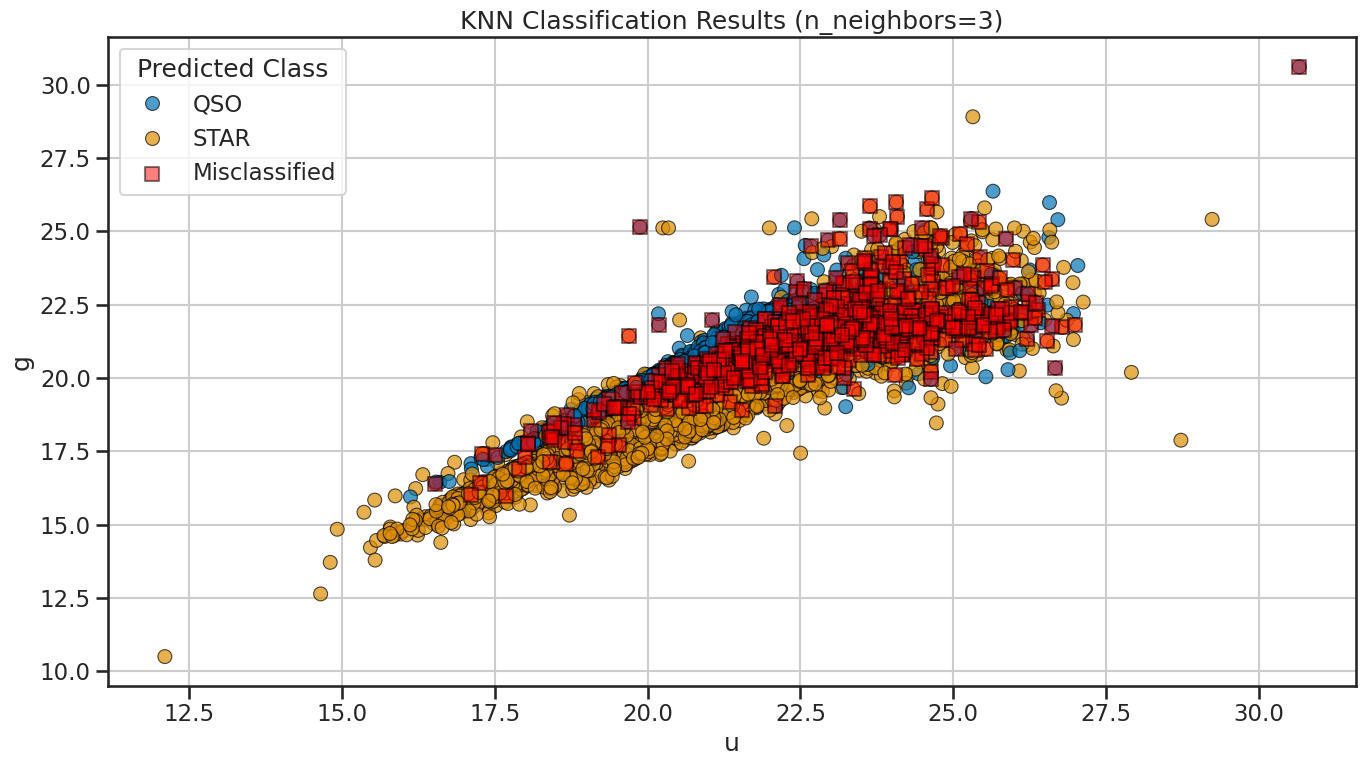

In [16]:
### your code here

plt.figure(figsize=(14, 8))
sns.scatterplot(data=correctly_classified_df, x='u', y='g', hue='predicted_class', edgecolor='black', s=100, alpha=0.7)
plt.scatter(misclassified_df['u'], misclassified_df['g'], color='red', label='Misclassified', edgecolors='black', s=100, alpha=0.5, marker='s')
plt.title('KNN Classification Results (n_neighbors=3)')
plt.xlabel('u')
plt.ylabel('g')
plt.legend(title='Predicted Class', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig('./figures/knn_classification_results_n3.png', dpi=300, bbox_inches='tight')
plt.show()

### Performance across different values of k

We can also experiment with different values of `k` to see how it affects the performance of the model. The code below will create a loop that trains a KNN classifier for different values of `k` and evaluates its performance using the classification report and confusion matrix. It will also plot the performance of the model for each value of `k`.

#### ✅ Tasks:
* Run the code below to experiment with different values of `k`.
* Make sure you understand what each line of code does.
* Explain the results to your neighbor.

From this experiment for our choice of seed, it appears that the best value is not k=3.

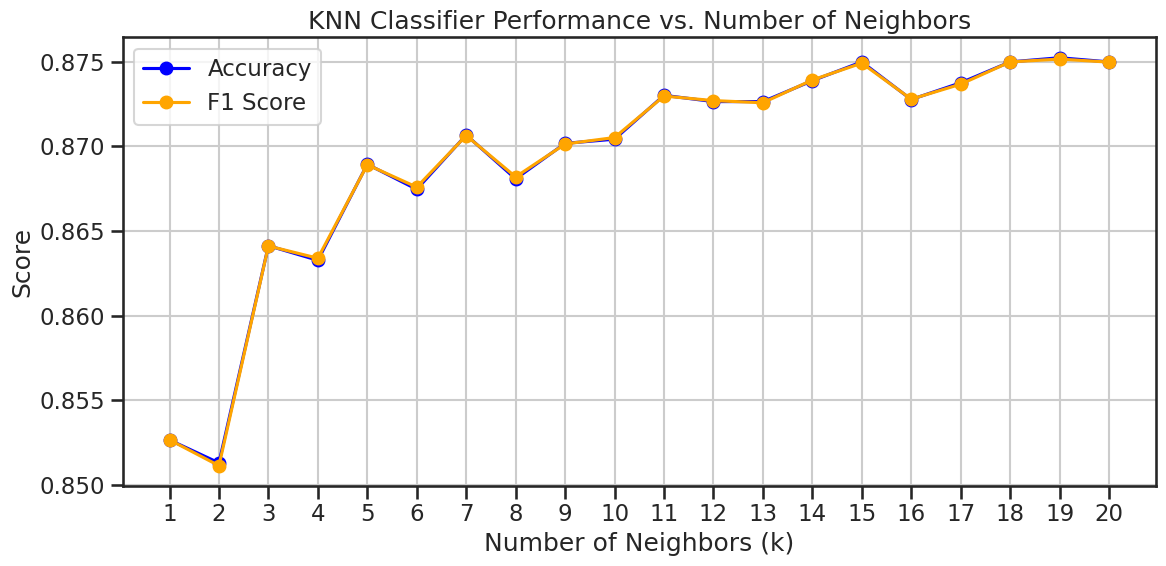

In [17]:
def knn_performance_vs_neighbors(X_train_scaled, y_train, X_test_scaled, y_test, k_range=range(1, 21)):
    from sklearn.metrics import accuracy_score, f1_score
    accuracies = []
    f1_scores = []
    for k in k_range:
        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        knn_classifier.fit(X_train_scaled, y_train)
        y_pred = knn_classifier.predict(X_test_scaled)
        accuracies.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    return list(k_range), accuracies, f1_scores

def plot_knn_performance(neighbors, accuracies, f1_scores, filename=None):
    plt.figure(figsize=(12, 6))
    plt.plot(neighbors, accuracies, marker='o', label='Accuracy', color='blue')
    plt.plot(neighbors, f1_scores, marker='o', label='F1 Score', color='orange')
    plt.title('KNN Classifier Performance vs. Number of Neighbors')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Score')
    plt.xticks(neighbors)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

neighbors, accuracies, f1_scores = knn_performance_vs_neighbors(X_train_scaled, y_train, X_test_scaled, y_test)
plot_knn_performance(neighbors, accuracies, f1_scores, './figures/knn_performance_vs_neighbors.png')

### Does another value of k work better?

In the plot above, you probably noticed that the performance of the model varies with different values of `k`. The best value of `k` is the one that gives the highest F1-score, which is a balance between precision and recall.

#### ✅ Tasks:
* For the value of `k` that gives the better F1-score, run a new KNN classifier and evaluate its performance using the classification report and confusion matrix.
* Make a plot of the correctly classified points and the misclassified points using `seaborn` and `matplotlib`.
* Explain the results to your neighbor and compare them to the previous results.

              precision    recall  f1-score   support

         QSO       0.87      0.86      0.87      3803
        STAR       0.88      0.89      0.88      4308

    accuracy                           0.87      8111
   macro avg       0.87      0.87      0.87      8111
weighted avg       0.87      0.87      0.87      8111



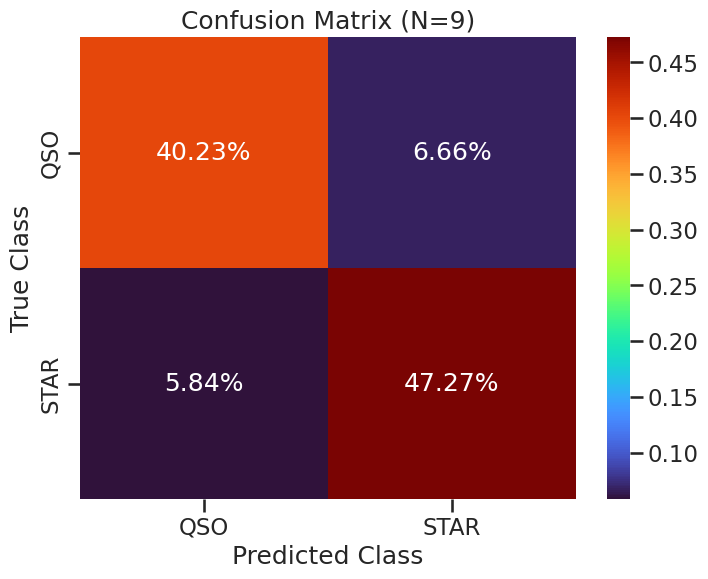

In [18]:
### your code here

# Create and train the KNN classifier with k=9
knn_classifier = KNeighborsClassifier(n_neighbors=15)
knn_classifier.fit(X_train_scaled, y_train)
y_pred = knn_classifier.predict(X_test_scaled)

# Print the classification report
print(classification_report(y_test, y_pred))

# Plot the confusion matrix using the modular function
conf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_matrix, knn_classifier.classes_, 9, './figures/confusion_matrix_knn_n15.png')

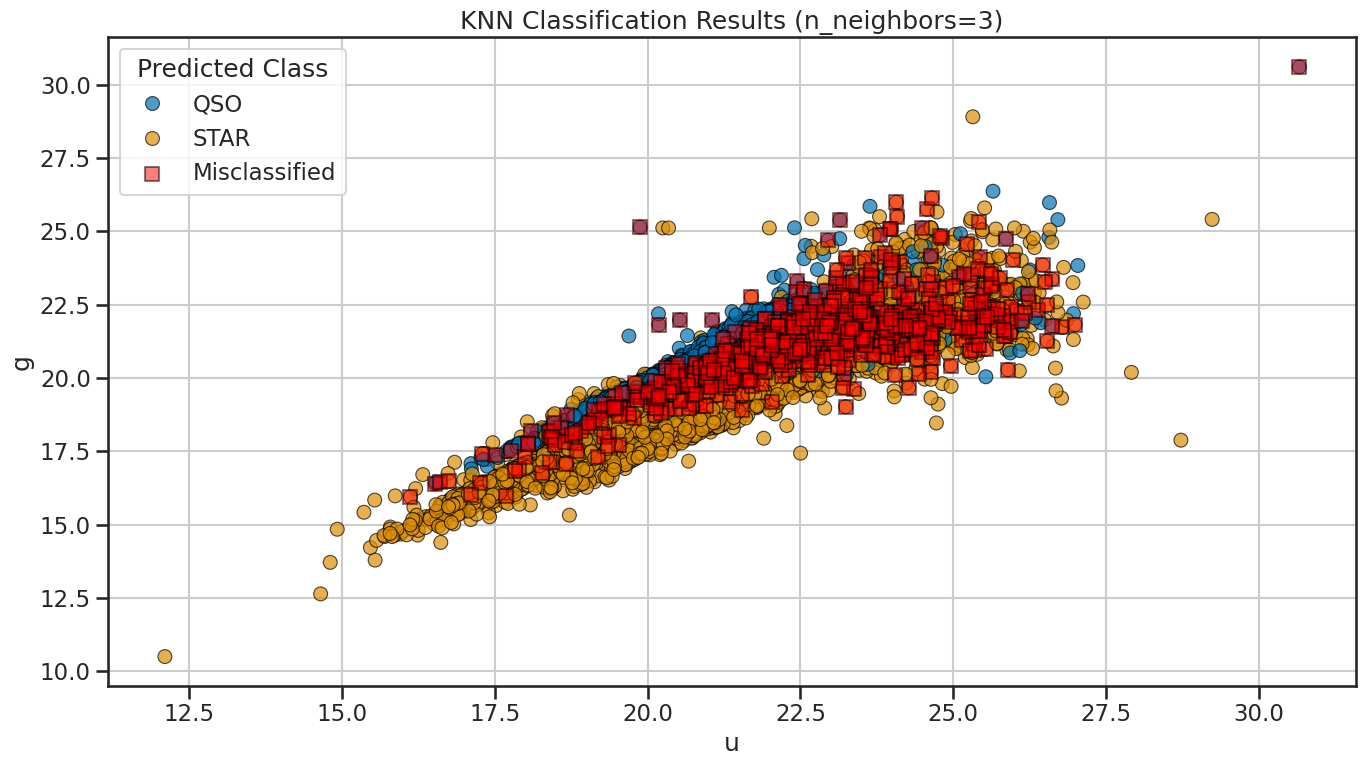

In [19]:
### your code here

correctly_classified_df, misclassified_df = get_classification_dfs(X_test, y_test, y_pred)

plt.figure(figsize=(14, 8))
sns.scatterplot(data=correctly_classified_df, x='u', y='g', hue='predicted_class', edgecolor='black', s=100, alpha=0.7)
plt.scatter(misclassified_df['u'], misclassified_df['g'], color='red', label='Misclassified', edgecolors='black', s=100, alpha=0.5, marker='s')
plt.title('KNN Classification Results (n_neighbors=3)')
plt.xlabel('u')
plt.ylabel('g')
plt.legend(title='Predicted Class', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig('./figures/knn_classification_results_n15.png', dpi=300, bbox_inches='tight')
plt.show()

---
<a id="two-class"></a>
## 3. The 2 Class Problem - Modeling With Redshift

Ok, now that we have a good understanding of how to build a KNN classifier and evaluate its performance, let's add the redshift feature to the model. This will allow us to see how well the model performs with this additional feature. See the plot below of the histogram of the redhift values for the different classes. It's likely that the redshift feature will improve the performance of the model, but we will see how much it helps.

#### ✅ Tasks:
* Run the code below to add the redshift feature to the model.
* Make sure you understand what each line of code does.

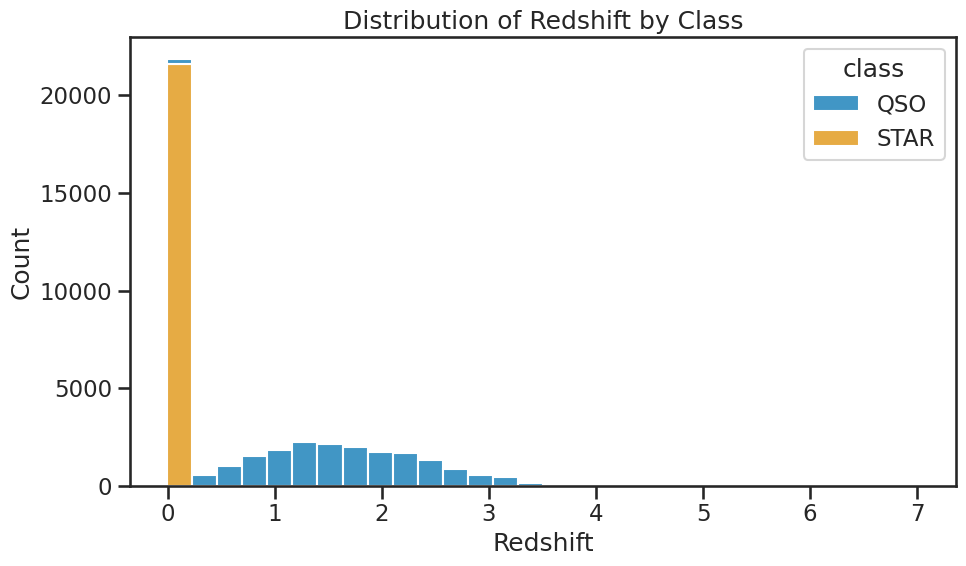

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_no_galaxies, x='redshift', hue='class', multiple='stack', bins=30)
plt.title('Distribution of Redshift by Class')
plt.xlabel('Redshift')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('./figures/histogram_redshift_by_class.png', dpi=300, bbox_inches='tight')
plt.show()

### Build, Train, and Evaluate the Model

We will use the same steps as before to build, train, and evaluate the model. The only difference is that we will include the redshift feature in the training and testing sets. We will also use the same value of `k` that we found to work best in the previous section.

#### ✅ Tasks:
* Run through the scikit-learn approach to build, train, and evaluate the model with the redshift feature.
* Use `k=3` for the KNN classifier and reserve 20% of the data for testing.
* Produce the classification report and confusion matrix (including the plot).
* Plot the correctly classified points and the misclassified points using `seaborn` and `matplotlib`.
* Explain the results to your neighbor and compare them to the previous results without the redshift feature.

              precision    recall  f1-score   support

         QSO       1.00      0.99      0.99      3803
        STAR       0.99      1.00      0.99      4308

    accuracy                           0.99      8111
   macro avg       0.99      0.99      0.99      8111
weighted avg       0.99      0.99      0.99      8111



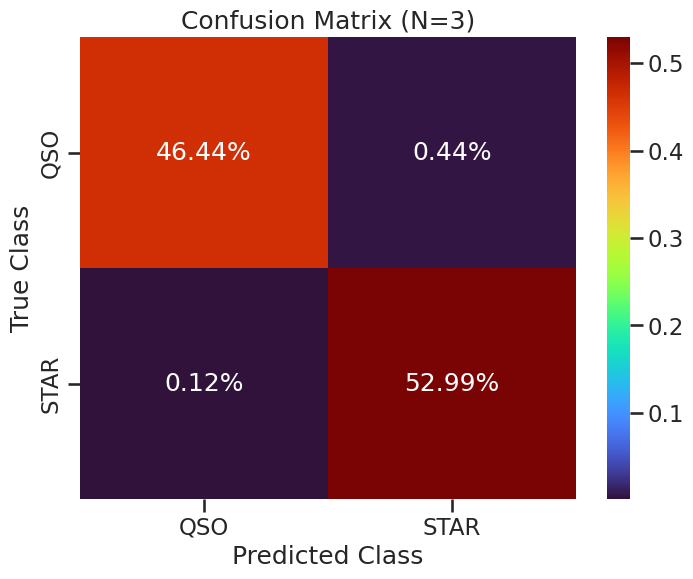

In [21]:
### your code here

# Define features  and target variable
X = df_no_galaxies[['u', 'g', 'r', 'i', 'z','redshift']]
y = df_no_galaxies['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_scaled, y_train)

# Evaluate the model

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test_scaled)

# Print the classification report
print(classification_report(y_test, y_pred))

# Plot the confusion matrix using the modular function
conf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_matrix, knn_classifier.classes_, 3, './figures/confusion_matrix_knn_w_redshift_n3.png')

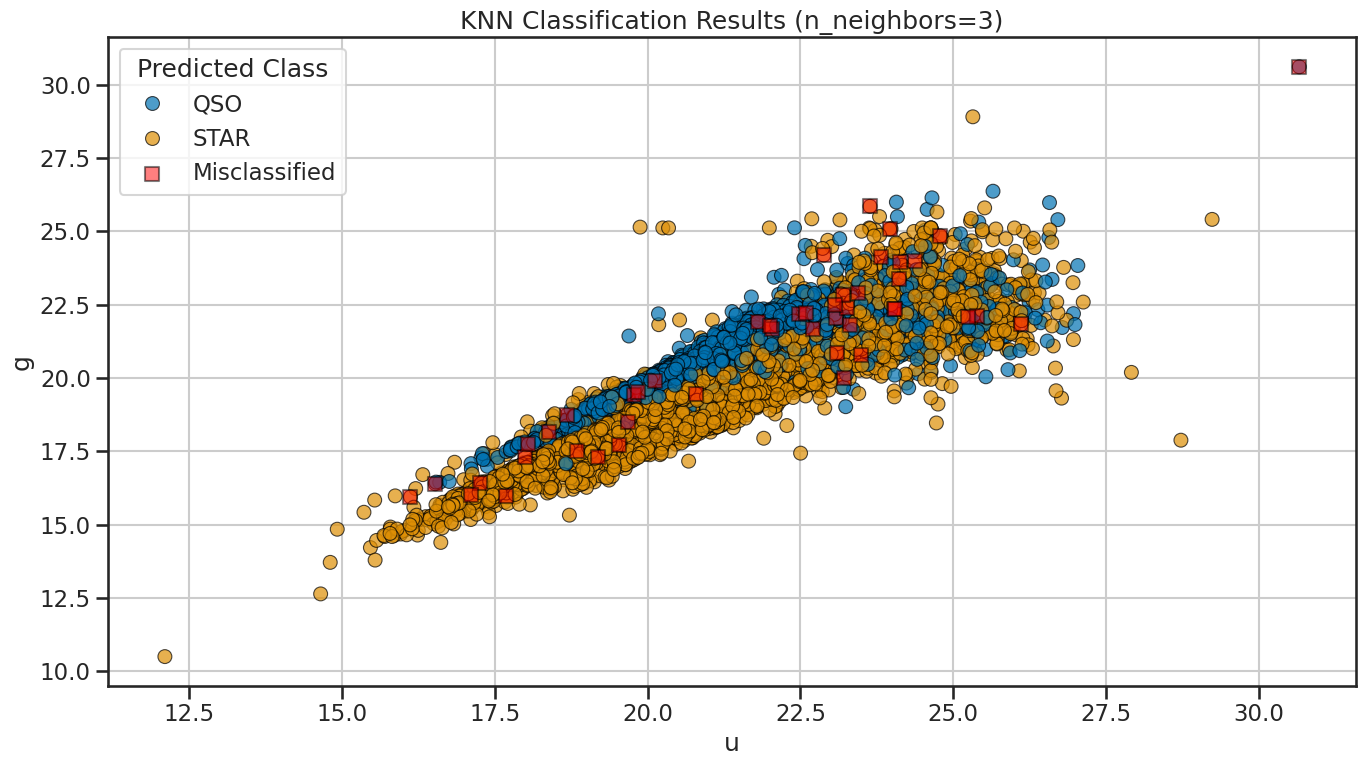

In [22]:
### your code here

correctly_classified_df, misclassified_df = get_classification_dfs(X_test, y_test, y_pred)

plt.figure(figsize=(14, 8))
sns.scatterplot(data=correctly_classified_df, x='u', y='g', hue='predicted_class', edgecolor='black', s=100, alpha=0.7)
plt.scatter(misclassified_df['u'], misclassified_df['g'], color='red', label='Misclassified', edgecolors='black', s=100, alpha=0.5, marker='s')
plt.title('KNN Classification Results (n_neighbors=3)')
plt.xlabel('u')
plt.ylabel('g')
plt.legend(title='Predicted Class', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig('./figures/knn_classification_results_w_redshift_n3.png', dpi=300, bbox_inches='tight')
plt.show()

### Performance Across Different Values of K

We can again investigate the performance of the model across different values of `k`. 

#### ✅ Tasks:
* Run the code below to experiment with different values of `k` and evaluate the performance of the model.
* Make sure you understand what each line of code does.
* Explain the results to your neighbor and compare them to the previous results without the redshift feature.

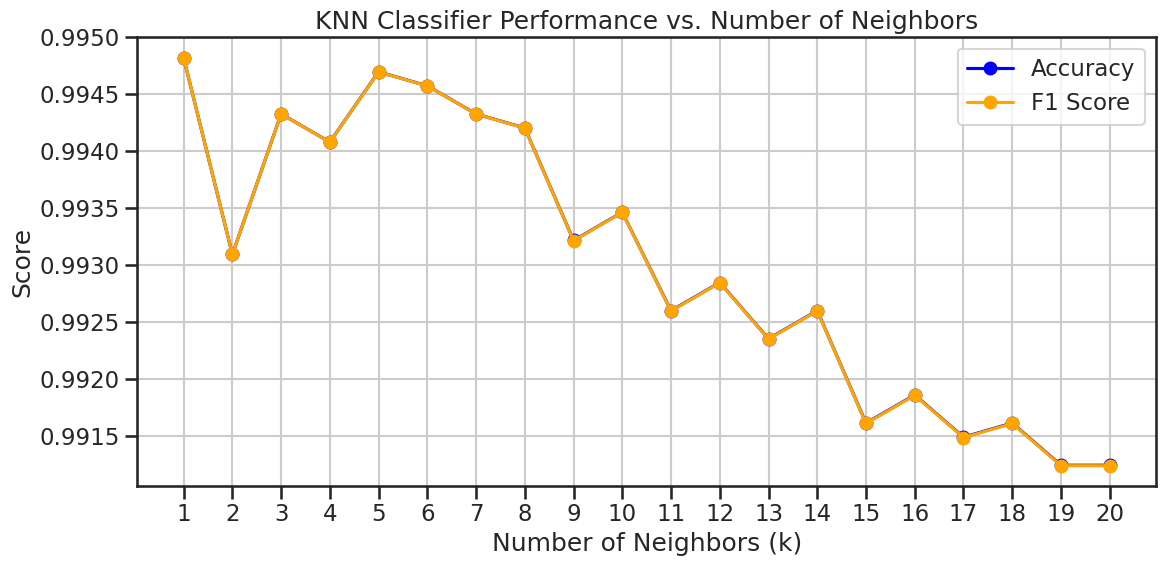

In [23]:
neighbors, accuracies, f1_scores = knn_performance_vs_neighbors(X_train_scaled, y_train, X_test_scaled, y_test)
plot_knn_performance(neighbors, accuracies, f1_scores, './figures/knn_w_redshit_performance_vs_neighbors.png')

---
<a id="three-class"></a>
## 4. The Three Class Problem - Modeling with Redshift

Great! Now that we have a good understanding of how to build a KNN classifier and evaluate its performance, let's add the GALAXY class back to the dataset. This will allow us to see how well the model performs with three classes. We will use the same steps as before to build, train, and evaluate the model.

#### ✅ Tasks:
* Run the code below to check that the GALAXY class is back in the dataset.
* Plot the histogram of the redshift values for the different classes to see how they relate to the classification.

In [24]:
df_stellar['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

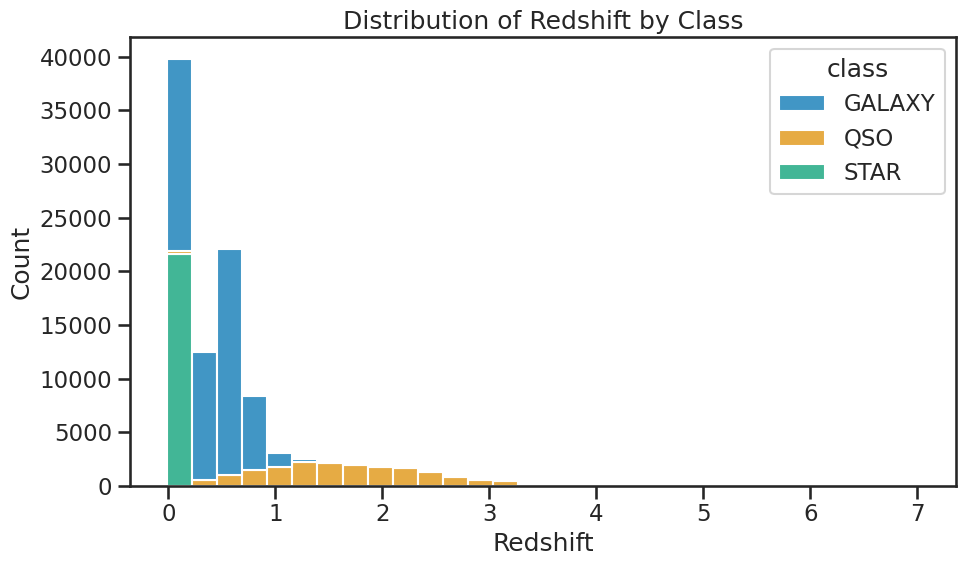

In [25]:
### your code here

plt.figure(figsize=(10, 6))
sns.histplot(data=df_stellar, x='redshift', hue='class', multiple='stack', bins=30)
plt.title('Distribution of Redshift by Class')
plt.xlabel('Redshift')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('./figures/3_object_histogram_redshift_by_class.png', dpi=300, bbox_inches='tight')
plt.show()

### Build, Train, and Evaluate the Model

Ok, let's build, train, and evaluate the model with the GALAXY class included. 

#### ✅ Tasks:
* Using the `scikit-learn` approach, build, train, and evaluate the model with the GALAXY class included.
* Use `k=3` for the KNN classifier and reserve 20% of the data for testing.
* Produce the classification report and confusion matrix (including the plot).
* Plot the correctly classified points and the misclassified points using `seaborn` and `matplotlib`.
* Explain the results to your neighbor and compare them to the previous results without the GALAXY class.

              precision    recall  f1-score   support

      GALAXY       0.97      0.97      0.97     11889
         QSO       0.96      0.93      0.94      3792
        STAR       0.94      0.98      0.96      4319

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000



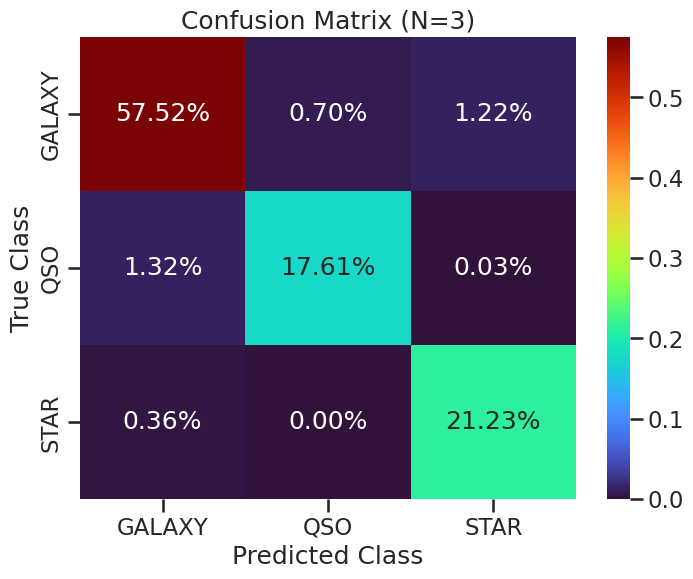

In [26]:
### your code here

# Define features  and target variable
X = df_stellar[['u', 'g', 'r', 'i', 'z','redshift']]
y = df_stellar['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_scaled, y_train)

# Evaluate the model
# Make predictions on the test set
y_pred = knn_classifier.predict(X_test_scaled)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print and plot the confusion matrix using the modular function
conf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_matrix, knn_classifier.classes_, 3, './figures/3_object_confusion_matrix_knn_w_redshift_n3.png')

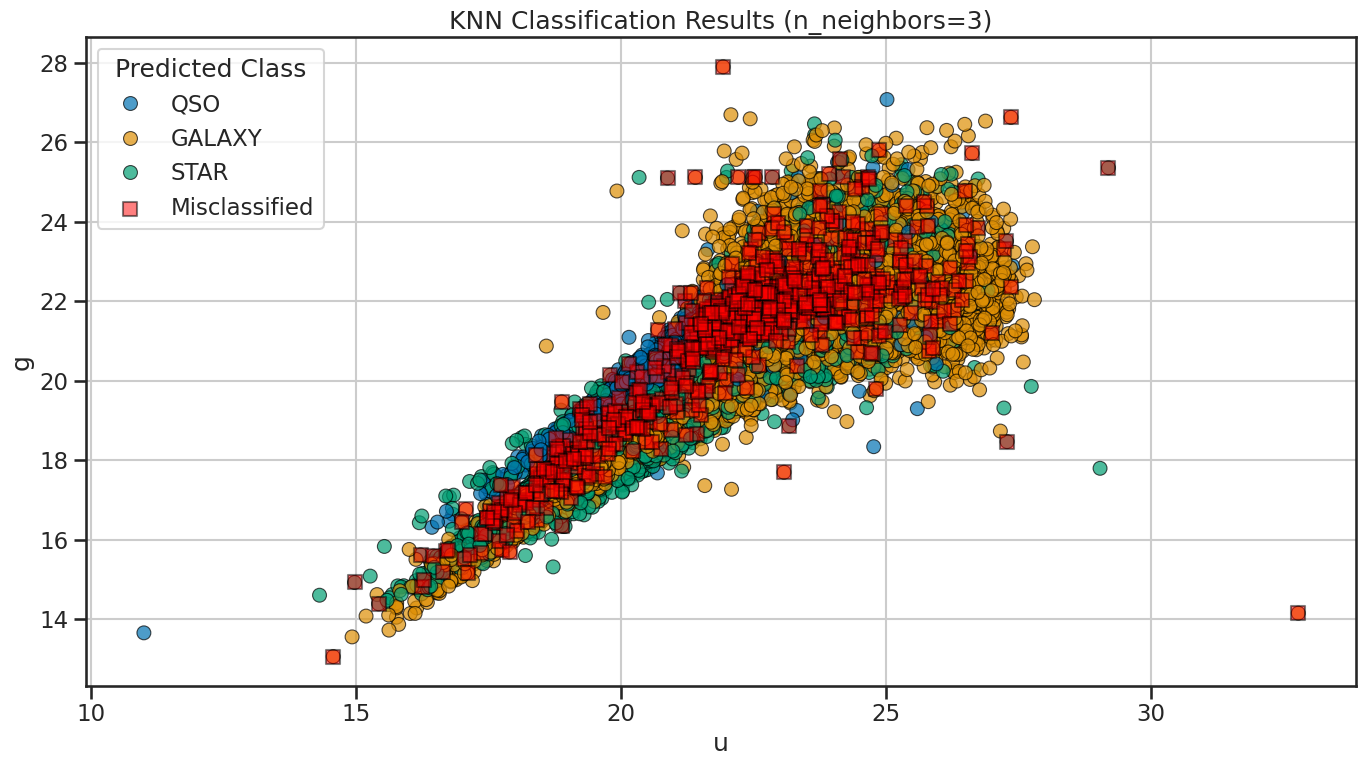

In [27]:
### your code here

correctly_classified_df, misclassified_df = get_classification_dfs(X_test, y_test, y_pred)

plt.figure(figsize=(14, 8))
sns.scatterplot(data=correctly_classified_df, x='u', y='g', hue='predicted_class', edgecolor='black', s=100, alpha=0.7)
plt.scatter(misclassified_df['u'], misclassified_df['g'], color='red', label='Misclassified', edgecolors='black', s=100, alpha=0.5, marker='s')
plt.title('KNN Classification Results (n_neighbors=3)')
plt.xlabel('u')
plt.ylabel('g')
plt.legend(title='Predicted Class', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig('./figures/knn_classification_results_3class_w_redshift_n3.png', dpi=300, bbox_inches='tight')
plt.show()